In [1]:
!pip3 install opencv_contrib-python

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# !pip install opencv-python
# !pip install --user opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17
!pip3 install opencv-python

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


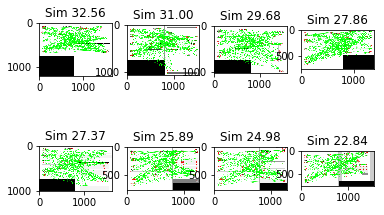

In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import math


def getMatchNum(matches,ratio):
    '''返回特征点匹配数量和匹配掩码'''
    matchesMask=[[0,0] for i in range(len(matches))]
    matchNum=0
    for i,(m,n) in enumerate(matches):
        if m.distance<ratio*n.distance: #将距离比率小于ratio的匹配点删选出来
            matchesMask[i]=[1,0]
            matchNum+=1
    return (matchNum,matchesMask)

path='C:/Users/changlin/img_processing/'
queryPath=path+'QueryImages2/' #图库路径
samplePath=path+'Testimg/1.png' #样本图片
comparisonImageList=[] #记录比较结果

#创建SIFT特征提取器
sift = cv2.xfeatures2d.SIFT_create() 
#创建FLANN匹配对象
FLANN_INDEX_KDTREE=0
indexParams=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
searchParams=dict(checks=50)
flann=cv2.FlannBasedMatcher(indexParams,searchParams)

sampleImage=cv2.imread(samplePath,0)
kp1, des1 = sift.detectAndCompute(sampleImage, None) #提取样本图片的特征
for parent,dirnames,filenames in os.walk(queryPath):
    for p in filenames:
        p=queryPath+p
        queryImage=cv2.imread(p,0)
        kp2, des2 = sift.detectAndCompute(queryImage, None) #提取比对图片的特征
        matches=flann.knnMatch(des1,des2,k=2) #匹配特征点，为了删选匹配点，指定k为2，这样对样本图的每个特征点，返回两个匹配
        (matchNum,matchesMask)=getMatchNum(matches,0.9) #通过比率条件，计算出匹配程度
        matchRatio=matchNum*100/len(matches)
        drawParams=dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=0)
        comparisonImage=cv2.drawMatchesKnn(sampleImage,kp1,queryImage,kp2,matches,None,**drawParams)
        comparisonImageList.append((comparisonImage,matchRatio)) #记录下结果

comparisonImageList.sort(key=lambda x:x[1],reverse=True) #按照匹配度排序
count=len(comparisonImageList)
column=4
row=math.ceil(count/column)
#绘图显示
plt.figsize=(16,16)
figure,ax=plt.subplots(row,column)
for index,(image,ratio) in enumerate(comparisonImageList):
    ax[int(index/column)][index%column].set_title('Sim %.2f' % ratio)
    ax[int(index/column)][index%column].imshow(image)
plt.show()

In [ ]:
nums = [1,1,2]

In [ ]:
set(nums)

In [ ]:
len(set(nums))

In [ ]:
!python -m pip install --upgrade pip
!pip install torch

In [ ]:
!pip install flair

In [ ]:
s1 = "Tom Jones\nTom Jones\nFranklin County Treasurer\n111 South High Street\nColumbus, OH 43215-6333\nes\nSTATE OF OHIO DEPT OF\n5814\nNATURAL RESOURCES\n2020 MORSE RD BLDG C\nCOLUMBUS, OH 43222-6693\n|||||llulumՐ vlr|cvlr|cvlr|cvlr|cԷԼ\nFranklin County, Ohio\nDelinquent Real Estate Tax Notice\nDue Date 10/19/2012\nOffice Hours: 8:00 am - 5:00 pm\nMonday through Friday\nPhone: 614-555-3458\nImportant Information\n*** ATTENTION: ORC Section 5721.32\npermits the County Treasurer to collect\ndelinquent taxes by selling tax lien\ncertificates. Failure to pay your\ndelinquent taxes may result in the sale\nof a tax lien certificate for this.\nproperty. Failure to pay by November\n30th will result in additional charges.\nAssessed Value\nTax Rate\n(35% of Market)\n99.860000\nLAND\nBUILDING\n46170\nReduction Factor\nTOTAL\n201260\n213652\nEffective Tax Rate\n78.524688\nTax Calculation\nReal Estate Taxes\n0.00\nTax Reduction\nSub Total\n0.00\n10% Rollback\n0.00\n2 1/2% Rollback\n0.00\nHomestead\n0.00\n0.00\n0.00\nDelinquent Taxes\n503.92\nPenalty\n78.11\nParcel Number\nOwner Name/Legal Description\n155090\n010-252525-00\nSTATE OF OHIO\nDEPT OF NATRL RESOURCES)\nMAP M161 B 01111\nTax District Name\nMORSE ROAD\nFOUNTAIN SQUARE SUB\nVAC ST & RES D & 1.833ACS\nCITY OF COLUMBUS\nTax Distribution\nCounty General Fund\n0.00 Senior Options\n0.00\nChildren Services\n0.00 Library\n0.00\nADAMH\n0.00 Joint Vocational School\n0.00\nMRDD\n0.00 City\n0.00\nParks\n0.00Township\n0.00\nZoo\n0.00 Schools\n0.00\nOther Information\n0.00\n9/17/2012\nCertified Delinquent Year 2012\nLynda A. Fones\n1013112\nFCT-F001 (9/11)\non back of form\nTo avoid publication, Amount Due must be paid by 10/19/2012.\nTotal Due\n582.03\nRetain this portion for your records.\nDetach here and return with your payment.\nDelinquent Real Estate Tax Notice\nTom Jones\nFranklin County Treasurer\nDue Date 10/19/2012\n111 South High Street\nParcel No. 010-252525-00 Stub No. 261267-2\nColumbus, OH 43215-6333 Check here it a change\nof address is indicated\nSTATE OF OHIO\n(DEPT OF NATRL RESOURCES)\nAmount Due\n$582.03\nPlease make your check payable to\nCDY 2012 Edward Leonard, Franklin County Treasurer\nTom Jones\nFranklin County Treasurer\nPO BOX 745691\nPaid\nCOLUMBUS, OH 43223-2533\nPlease use return envelope provided when paying by mail.\nMake sure address shows in window.\n9/17/2012\nAmount $\nYTYY\n102533230001026126780000780000 000582034\n"

In [ ]:
s1 = ' '.join(s1.split('\n'))
s1

In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

# make a sentence
sentence = Sentence(s1)

# load the NER tagger
tagger = SequenceTagger.load('ner')

# run NER over sentence
tagger.predict(sentence)

# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)